In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
#import netCDF4

from cartopy import config

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from matplotlib import gridspec

import scipy.signal
from scipy.stats import sem

from mpl_toolkits.axes_grid1 import ImageGrid

from scipy.ndimage import uniform_filter1d

from scipy.ndimage import gaussian_filter1d



## CASCCAD

In [2]:
dri1 = '/home/ffahrin/test/CASCCAD/'
fni1 = 'cusc_sc2D_200701-201612_monavg_try.nc'
data_obs_sc = xr.open_dataset(dri1+fni1, engine='netcdf4')   #sc

fni1 = 'cusc_cul2D_200701-201612_monavg_try.nc'
data_obs_cu = xr.open_dataset(dri1+fni1, engine='netcdf4')   #cu

fni1 = 'cusc_low2D_200701-201612_monavg_try.nc'          #lcc
#data_obs_lcc = xr.open_dataset(dri1+fni1, engine='netcdf4')
#------------------------------------------------------------------------




In [3]:
data_obs_cu

<xarray.Dataset> Size: 10MB
Dimensions:    (time: 120, latitude: 73, longitude: 144)
Coordinates:
  * time       (time) datetime64[ns] 960B 2007-01-16T10:00:00 ... 2016-12-16T...
  * latitude   (latitude) float32 292B 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
Data variables:
    cul2D      (time, latitude, longitude) float64 10MB ...

In [4]:
dri1 = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monavg/'
fni1 = 'ERA5_normalized_ctp_sc_lcc_2007_2016_2.5deg_monavg_composited.nc'   #era5 sc lcc

data_era_sc = xr.open_dataset(dri1+fni1, engine='netcdf4')


fni1 = 'ERA5_normalized_ctp_cu_lcc_2007_2016_2.5deg_monavg_composited.nc'  # era5 cu lcc
data_era_cu = xr.open_dataset(dri1+fni1, engine='netcdf4')



In [5]:
dri1 = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monavg/'

fni1 = 'MERRA2_normalized_ctp_sc_lcc_2007_2016_2.5deg_monavg_composited.nc' # merra2 sc lcc
data_merra_sc = xr.open_dataset(dri1+fni1, engine='netcdf4')


fni1 = 'MERRA2_normalized_ctp_cu_lcc_2007_2016_2.5deg_monavg_composited.nc'   # merra2 cu lcc
data_merra_cu = xr.open_dataset(dri1+fni1, engine='netcdf4')

In [6]:
# filtered composited  ERA5 omega files


dri1 = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/normalized_ctp_files/monavg/'

fni1 = 'ERA5_normalized_ctp_sc_w_2007_2016_2.5deg_monavg_composited.nc'
data_era_om_sc = xr.open_dataset(dri1+fni1, engine='netcdf4')


fni1 = 'ERA5_normalized_ctp_cu_w_2007_2016_2.5deg_monavg_composited.nc'
data_era_om_cu = xr.open_dataset(dri1+fni1, engine='netcdf4')


In [7]:
# filtered composited  MERRA2 omega files

dri1 = '/lss/research/agon-lab/MERRA2_3hrly/normalized_ctp/monavg/'


fni1 = 'MERRA2_normalized_ctp_sc_w_2007_2016_2.5deg_monavg_composited.nc'
data_merra_om_sc = xr.open_dataset(dri1+fni1, engine='netcdf4')

fni1 = 'MERRA2_normalized_ctp_cu_w_2007_2016_2.5deg_monavg_composited.nc'
data_merra_om_cu = xr.open_dataset(dri1+fni1, engine='netcdf4')



In [8]:
#original omega files

dri1 = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/omega/global/'
fni1 = 'ERA5_w_2007-2016_2.5deg_global_monavg.nc'
data_er_om_lcc = xr.open_dataset(dri1+fni1, engine='netcdf4')


dri1 = '/lss/research/agon-lab/MERRA2_3hrly/'
fni1 = 'MERRA2_OMEGA_2007-2016_2.5deg_monavg.nc'
data_merra_om_lcc = xr.open_dataset(dri1+fni1, engine='netcdf4')


#-----------------------------------------------------------------

dri = '/lss/research/agon-lab/ERA5_ITCZ_Subdaily/'
fni = 'ERA5_lcc_2007-2016_2.5deg_monavg.nc'

#data_lcc_er = xr.open_dataset(dri+fni, engine='netcdf4')



#--------------------------------------------------------------

dri1 = '/lss/research/agon-lab/MERRA2_3hrly/'
fn1 = 'MERRA2_CLDLOW_2007-2016_2.5deg_monavg.nc'

#data_lcc_merra = xr.open_dataset(dri1+fni1, engine='netcdf4')



In [9]:
data_era_sc

<xarray.Dataset> Size: 495kB
Dimensions:    (time: 120, bnds: 2, longitude: 41, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 960B 2007-01-16T10:30:00 ... 2016-12-16T...
  * longitude  (longitude) float64 328B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * latitude   (latitude) float64 200B -30.0 -27.5 -25.0 ... 25.0 27.5 30.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2kB ...
    lcc        (time, latitude, longitude) float32 492kB ...
Attributes:
    CDI:          Climate Data Interface version 2.4.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    frequency:    mon
    history:      Fri May 23 19:05:59 2025: cdo monmean ERA5_normalized_ctp_s...
    CDO:          Climate Data Operators version 2.4.1 (https://mpimet.mpg.de...

In [10]:
lat0_eq = 30
lat1_eq = -30

lon0_eq = 200
lon1_eq = 300

#lone= -180
#lonw= 179

lev_om = 500

levname = 'level'
latname = 'latitude'
lonname = 'longitude'

In [11]:
# land-sea mask
fn_lsm = '/lss/research/agon-lab/ERA5_ITCZ_daily/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm_eq = data_lsm['lsm'][0,::10,::10].sel(latitude=slice(lat0_eq,lat1_eq),longitude=slice(lon0_eq,lon1_eq))
lsm_eq

<xarray.DataArray 'lsm' (latitude: 25, longitude: 41)> Size: 8kB
[1025 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * latitude   (latitude) float32 100B 30.0 27.5 25.0 22.5 ... -25.0 -27.5 -30.0
    time       datetime64[ns] 8B 1979-01-01
Attributes:
    units:          (0 - 1)
    long_name:      Land-sea mask
    standard_name:  land_binary_mask

In [13]:
lcc_om_era = data_er_om_lcc['w'].sel({latname:slice(lat0_eq,lat1_eq),lonname:slice(lon0_eq,lon1_eq)}).sel(pressure_level = lev_om).where(lsm_eq==0)
lcc_om_merra = data_merra_om_lcc['OMEGA'].sel({latname:slice(lat0_eq,lat1_eq),lonname:slice(lon0_eq,lon1_eq)}).sel({levname:lev_om}).where(lsm_eq==0)



In [14]:
era_lcc_om_flat_dropna = lcc_om_era.stack(z=('valid_time',latname,lonname)).dropna(dim='z')*(86400/100)
merra_lcc_om_flat_dropna = lcc_om_merra.stack(z=('time',latname,lonname)).dropna(dim='z')*(86400/100)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

hist_era, bin_edges_era = np.histogram(era_lcc_om_flat_dropna, bins =100,density = True)
hist_merra, bin_edges_merra = np.histogram(merra_lcc_om_flat_dropna, bins =100,density = True)

# Smooth histogram using Gaussian filter
smoothed_hist_om_era = gaussian_filter1d(hist_era, sigma=1)
smoothed_hist_om_merra = gaussian_filter1d(hist_merra, sigma=1)




In [16]:
lat0 = -30
lat1 = 0

#lon0 = 120
#lon1 = 325

#lone= -120
#lonw= -80

lon0=200
lon1 = 300

lone=-160
lonw= -60

lev_om = 700

levname = 'level'
latname = 'latitude'
lonname = 'longitude'

In [17]:
lsm = data_lsm['lsm'][0,::-10,::10].sel(latitude=slice(lat0,lat1),longitude=slice(lon0,lon1))
lsm

<xarray.DataArray 'lsm' (latitude: 13, longitude: 41)> Size: 4kB
[533 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * latitude   (latitude) float32 52B -30.0 -27.5 -25.0 -22.5 ... -5.0 -2.5 0.0
    time       datetime64[ns] 8B 1979-01-01
Attributes:
    units:          (0 - 1)
    long_name:      Land-sea mask
    standard_name:  land_binary_mask

In [18]:
# make zeros nans (only works for cloud categories, not for all low clouds)
lcc_obs_sc = data_obs_sc['sc2D'].where(lsm==0)
lcc_obs_cu = data_obs_cu['cul2D'].where(lsm==0)



lcc_era_sc_xr = data_era_sc['lcc'].where(lsm==0)
lcc_era_cu_xr = data_era_cu['lcc'].where(lsm==0)


lcc_merra_sc = data_merra_cu['lcc'].where(lsm==0)
lcc_merra_cu = data_merra_cu['lcc'].where(lsm==0)


In [19]:
lcc_era_sc_xr

<xarray.DataArray 'lcc' (time: 120, latitude: 13, longitude: 41)> Size: 256kB
array([[[0.5993394 , 0.61211485, 0.58435655, ...,        nan,
                nan,        nan],
        [0.48818186, 0.52099365, 0.413051  , ...,        nan,
                nan,        nan],
        [0.33234808, 0.38681293, 0.3230332 , ...,        nan,
                nan,        nan],
        ...,
        [0.19280788, 0.22760156, 0.2018137 , ...,        nan,
                nan,        nan],
        [0.2124681 , 0.21091132, 0.22439359, ...,        nan,
                nan,        nan],
        [0.19877201, 0.2185154 , 0.23258527, ...,        nan,
                nan,        nan]],

       [[0.39014366, 0.41683006, 0.39724454, ...,        nan,
                nan,        nan],
        [0.37854004, 0.30449486, 0.40373904, ...,        nan,
                nan,        nan],
        [0.39717215, 0.36450958, 0.44951057, ...,        nan,
                nan,        nan],
...
        [0.3409176 , 0.32861653, 0.3295871 , ...,        nan,
                nan,        nan],
        [0.3305019 , 0.3274679 , 0.37435108, ...,        nan,
                nan,        nan],
        [0.273506  , 0.2524063 , 0.32789025, ...,        nan,
                nan,        nan]],

       [[0.41598934, 0.5273567 , 0.48084995, ...,        nan,
                nan,        nan],
        [0.47542763, 0.48628107, 0.4840137 , ...,        nan,
                nan,        nan],
        [0.6210365 , 0.55769825, 0.40384504, ...,        nan,
                nan,        nan],
        ...,
        [0.31572622, 0.32381192, 0.33766374, ...,        nan,
                nan,        nan],
        [0.35566995, 0.39115143, 0.3409647 , ...,        nan,
                nan,        nan],
        [0.31934166, 0.32523248, 0.27177915, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 960B 2007-01-16T10:30:00 ... 2016-12-16T...
  * longitude  (longitude) float64 328B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * latitude   (latitude) float64 104B -30.0 -27.5 -25.0 -22.5 ... -5.0 -2.5 0.0
Attributes:
    standard_name:  low cloud cover
    long_name:      low cloud cover
    units:          (0-1)
    cell_methods:   time: mean

In [20]:
time = data_era_om_sc['time']
lat = lcc_era_sc_xr['latitude']
lon = lcc_era_sc_xr['longitude']

nt = len(time)
nlon = len(lon)
nlat = len(lat)

In [21]:
lcc_era_sc = xr.DataArray(lcc_era_sc_xr.values, coords=[time, lat, lon], dims=['time','latitude','longitude'])
lcc_era_cu = xr.DataArray(lcc_era_cu_xr.values, coords=[time, lat, lon], dims=['time','latitude','longitude'])

In [22]:
lcc_merra_sc

<xarray.DataArray 'lcc' (time: 120, latitude: 13, longitude: 41)> Size: 256kB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan, 0.20949809, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.02946281,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.18767555,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.02687399,        nan, ...,        nan,
                nan,        nan],
        [0.09496803,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 960B 2007-01-16T10:00:00 ... 2016-12-16T...
  * longitude  (longitude) float32 164B 200.0 202.5 205.0 ... 295.0 297.5 300.0
  * latitude   (latitude) float32 52B -30.0 -27.5 -25.0 -22.5 ... -5.0 -2.5 0.0
Attributes:
    standard_name:  Fraction of cloud covermask
    long_name:      Fraction of cloud cover mask
    units:          (0 and 1)
    cell_methods:   time: mean

In [24]:
om_era_sc = data_era_om_sc['w'].sel({levname:lev_om}).where(lsm==0)
om_era_cu = data_era_om_cu['w'].sel({levname:lev_om}).where(lsm==0)

om_merra_sc= data_merra_om_sc['w'].sel({levname:lev_om}).where(lsm==0)
om_merra_cu= data_merra_om_cu['w'].sel({levname:lev_om}).where(lsm==0)


In [25]:
era_om_region = (data_er_om_lcc['w'][:,:,::-1,:].sel(pressure_level = lev_om).sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)})*(86400/100)).where(lsm==0)
merra_om_region = (data_merra_om_lcc['OMEGA'][:,:,::-1,:].sel({levname:lev_om}).sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)})*(86400/100)).where(lsm==0)

In [27]:
era_lcc_sc_region = lcc_era_cu[:,:,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)}).where(lsm==0)

era_om_sc_region = (om_era_sc[:,:,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)})*(86400/100)).where(lsm==0)

era_lcc_cu_region = lcc_era_cu[:,:,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)}).where(lsm==0)

era_om_cu_region = (om_era_cu[:,:,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)})*(86400/100)).where(lsm==0)


In [28]:
obs_lcc_sc_region = lcc_obs_sc[:,::-1,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)}).where(lsm==0)
obs_lcc_cu_region = lcc_obs_cu[:,::-1,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)}).where(lsm==0)

In [29]:
merra_lcc_sc_region = lcc_merra_sc[:,:,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)}).where(lsm==0)
merra_lcc_cu_region = lcc_merra_cu[:,:,:].sel({latname:slice(lat0,lat1),lonname:slice(lon0,lon1)}).where(lsm==0)

merra_om_sc_region = (om_merra_sc[:,:,:].sel(latitude=slice(lat0,lat1),longitude=slice(lon0,lon1))*(86400/100)).where(lsm==0)
merra_om_cu_region = (om_merra_cu[:,:,:].sel(latitude=slice(lat0,lat1),longitude=slice(lon0,lon1))*(86400/100)).where(lsm==0)



In [30]:
lat = merra_lcc_sc_region['latitude']
lon = merra_lcc_sc_region['longitude']
time = era_om_sc_region['time']

merra_lcc_sc_region_xr= xr.DataArray(merra_lcc_sc_region.values, coords=[time, lat, lon], dims=['time','latitude', 'longitude'])

merra_lcc_cu_region_xr= xr.DataArray(merra_lcc_cu_region.values, coords=[time, lat, lon], dims=['time','latitude', 'longitude'])

#merra_lcc_region_xr= xr.DataArray(merra_lcc_region.values, coords=[time, lat, lon], dims=['time','latitude', 'longitude'])

In [31]:
merra_om_sc_region_xr= xr.DataArray(merra_om_sc_region.values, coords=[time, lat, lon], dims=['time','latitude', 'longitude'])

merra_om_cu_region_xr= xr.DataArray(merra_om_cu_region.values, coords=[time, lat, lon], dims=['time','latitude', 'longitude'])

merra_om_region_xr= xr.DataArray(merra_om_region.values, coords=[time, lat, lon], dims=['time','latitude', 'longitude'])

In [33]:
er_om_sc_flat_dropna = era_om_sc_region.stack(z=('time',latname,lonname)).dropna(dim='z')
er_om_cu_flat_dropna = era_om_cu_region.stack(z=('time',latname,lonname)).dropna(dim='z')


#obs_om_cu_flat_dropna = obs_lcc_cu_region.stack(z=('time',latname,lonname)).dropna(dim='z')



merra_om_sc_flat_dropna = merra_om_sc_region_xr.stack(z=('time',latname,lonname)).dropna(dim='z')
merra_om_cu_flat_dropna = merra_om_cu_region_xr.stack(z=('time',latname,lonname)).dropna(dim='z')

In [34]:
er_lcc_sc_flat_dropna = era_lcc_sc_region.stack(z=('time',latname,lonname)).dropna(dim='z')
er_lcc_cu_flat_dropna = era_lcc_cu_region.stack(z=('time',latname,lonname)).dropna(dim='z')

merra_lcc_sc_flat_dropna = merra_lcc_sc_region_xr.stack(z=('time',latname,lonname)).dropna(dim='z')
merra_lcc_cu_flat_dropna = merra_lcc_cu_region_xr.stack(z=('time',latname,lonname)).dropna(dim='z')

In [35]:
om_val = np.arange(-100,105,5)
nval = len(om_val)


In [36]:
era_sc_region_mean = np.zeros(nval)
era_sc_region_sum = np.zeros(nval)
era_sc_region_std = np.zeros(nval)

obs_sc_region_mean_era = np.zeros(nval)
obs_sc_region_sum_era = np.zeros(nval)
obs_sc_region_std_era = np.zeros(nval)

obs_sc_region_mean_merra = np.zeros(nval)
obs_sc_region_sum_merra = np.zeros(nval)
obs_sc_region_std_merra = np.zeros(nval)


merra_sc_region_mean = np.zeros(nval)
merra_sc_region_sum = np.zeros(nval)
merra_sc_region_std = np.zeros(nval)

In [37]:
era_cu_region_mean = np.zeros(nval)
era_cu_region_sum = np.zeros(nval)
era_cu_region_std = np.zeros(nval)

obs_cu_region_mean_era = np.zeros(nval)
obs_cu_region_sum_era = np.zeros(nval)
obs_cu_region_std_era = np.zeros(nval)

obs_cu_region_mean_merra = np.zeros(nval)
obs_cu_region_sum_merra = np.zeros(nval)
obs_cu_region_std_merra = np.zeros(nval)


merra_cu_region_mean = np.zeros(nval)
merra_cu_region_sum = np.zeros(nval)
merra_cu_region_std = np.zeros(nval)

In [38]:
for t in range(nval-1):
    obs_sc_region_mean_era[t] = obs_lcc_sc_region.where((era_om_region>= om_val[t]) & (era_om_region< om_val[t+1])).mean()
    obs_sc_region_mean_merra[t] = obs_lcc_sc_region.where((merra_om_region_xr>=om_val[t]) & (merra_om_region_xr< om_val[t+1])).mean()
    
    era_sc_region_mean[t] = era_lcc_sc_region.where((era_om_sc_region>=om_val[t]) & (era_om_sc_region< om_val[t+1])).mean()
    merra_sc_region_mean[t] = merra_lcc_sc_region_xr.where((merra_om_sc_region_xr>=om_val[t]) & (merra_om_sc_region_xr< om_val[t+1])).mean()


    obs_sc_region_std_era[t] = (obs_lcc_sc_region.where((era_om_region>=om_val[t]) & (era_om_region<om_val[t+1]))).std()
    obs_sc_region_std_merra[t] = (obs_lcc_sc_region.where((merra_om_region_xr>=om_val[t]) & (merra_om_region_xr<om_val[t+1]))).std()
    
    era_sc_region_std[t] = (era_lcc_sc_region.where((era_om_sc_region>=om_val[t]) & (era_om_sc_region<om_val[t+1]))).std()
    merra_sc_region_std[t] = (merra_lcc_sc_region.where((merra_om_sc_region_xr>=om_val[t]) & (merra_om_sc_region_xr<om_val[t+1]))).std()

    obs_sc_region_sum_era[t] = obs_lcc_sc_region.where((era_om_region>= om_val[t]) & (era_om_region< om_val[t+1])).sum()
    obs_sc_region_sum_merra[t] = obs_lcc_sc_region.where((merra_om_region_xr>=om_val[t]) & (merra_om_region_xr< om_val[t+1])).sum()
    
    era_sc_region_sum[t] = era_lcc_sc_region.where((era_om_sc_region>=om_val[t]) & (era_om_sc_region< om_val[t+1])).sum()
    merra_sc_region_sum[t] = merra_lcc_sc_region_xr.where((merra_om_sc_region_xr>=om_val[t]) & (merra_om_sc_region_xr< om_val[t+1])).sum()
    #err_lcc = np.std( lcc_region_std, ddof=1) / np.sqrt(np.size( lcc_region_std))


In [39]:
for t in range(nval-1):
    obs_cu_region_mean_era[t] = obs_lcc_cu_region.where((era_om_region>= om_val[t]) & (era_om_region< om_val[t+1])).mean()
    obs_cu_region_mean_merra[t] = obs_lcc_cu_region.where((merra_om_region_xr>=om_val[t]) & (merra_om_region_xr< om_val[t+1])).mean()
    
    era_cu_region_mean[t] = era_lcc_cu_region.where((era_om_cu_region>=om_val[t]) & (era_om_cu_region< om_val[t+1])).mean()
    merra_cu_region_mean[t] = merra_lcc_cu_region_xr.where((merra_om_cu_region_xr>=om_val[t]) & (merra_om_cu_region_xr< om_val[t+1])).mean()


    obs_cu_region_std_era[t] = (obs_lcc_cu_region.where((era_om_region>=om_val[t]) & (era_om_region<om_val[t+1]))).std()
    obs_cu_region_std_merra[t] = (obs_lcc_cu_region.where((merra_om_region_xr>=om_val[t]) & (merra_om_region_xr<om_val[t+1]))).std()
    
    era_cu_region_std[t] = (era_lcc_cu_region.where((era_om_cu_region>=om_val[t]) & (era_om_cu_region<om_val[t+1]))).std()
    merra_cu_region_std[t] = (merra_lcc_cu_region.where((merra_om_cu_region_xr>=om_val[t]) & (merra_om_cu_region_xr<om_val[t+1]))).std()

    obs_cu_region_sum_era[t] = obs_lcc_cu_region.where((era_om_region>= om_val[t]) & (era_om_region< om_val[t+1])).sum()
    obs_cu_region_sum_merra[t] = obs_lcc_cu_region.where((merra_om_region_xr>=om_val[t]) & (merra_om_region_xr< om_val[t+1])).sum()
    
    era_cu_region_sum[t] = era_lcc_cu_region.where((era_om_cu_region>=om_val[t]) & (era_om_cu_region< om_val[t+1])).sum()
    merra_cu_region_sum[t] = merra_lcc_cu_region_xr.where((merra_om_cu_region_xr>=om_val[t]) & (merra_om_cu_region_xr< om_val[t+1])).sum()

In [40]:
om_val_ta = np.arange(-100,20,5)
nval_ta = len(om_val_ta)

In [41]:
obs_sc_sample_era = obs_sc_region_sum_era/obs_sc_region_mean_era

obs_sc_sample_merra = obs_sc_region_sum_merra/obs_sc_region_mean_merra


obs_cu_sample_era = obs_cu_region_sum_era/obs_cu_region_mean_era

obs_cu_sample_merra = obs_cu_region_sum_merra/obs_cu_region_mean_merra

/tmp/ipykernel_2003535/3671338286.py:1: RuntimeWarning: invalid value encountered in divide
  obs_sc_sample_era = obs_sc_region_sum_era/obs_sc_region_mean_era
/tmp/ipykernel_2003535/3671338286.py:3: RuntimeWarning: invalid value encountered in divide
  obs_sc_sample_merra = obs_sc_region_sum_merra/obs_sc_region_mean_merra
/tmp/ipykernel_2003535/3671338286.py:6: RuntimeWarning: invalid value encountered in divide
  obs_cu_sample_era = obs_cu_region_sum_era/obs_cu_region_mean_era
/tmp/ipykernel_2003535/3671338286.py:8: RuntimeWarning: invalid value encountered in divide
  obs_cu_sample_merra = obs_cu_region_sum_merra/obs_cu_region_mean_merra


In [43]:
era_sc_sample = era_sc_region_sum/era_sc_region_mean
merra_sc_sample = merra_sc_region_sum/merra_sc_region_mean


era_cu_sample = era_cu_region_sum/era_cu_region_mean
merra_cu_sample = merra_cu_region_sum/merra_cu_region_mean

/tmp/ipykernel_2003535/2832588401.py:1: RuntimeWarning: invalid value encountered in divide
  era_sc_sample = era_sc_region_sum/era_sc_region_mean
/tmp/ipykernel_2003535/2832588401.py:2: RuntimeWarning: invalid value encountered in divide
  merra_sc_sample = merra_sc_region_sum/merra_sc_region_mean
/tmp/ipykernel_2003535/2832588401.py:5: RuntimeWarning: invalid value encountered in divide
  era_cu_sample = era_cu_region_sum/era_cu_region_mean
/tmp/ipykernel_2003535/2832588401.py:6: RuntimeWarning: invalid value encountered in divide
  merra_cu_sample = merra_cu_region_sum/merra_cu_region_mean


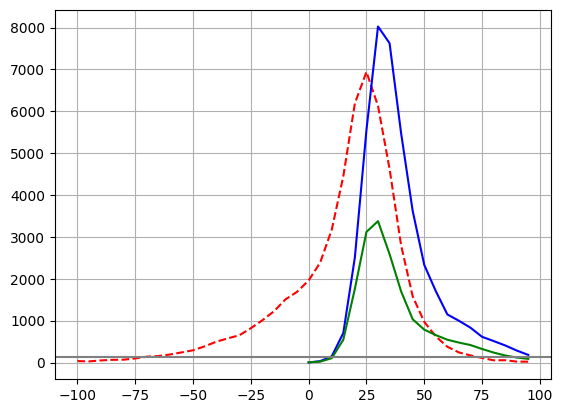

In [44]:
#plt.plot(om_val,obs_sc_sample_era, color = 'red')
plt.plot(om_val,obs_sc_sample_merra, color = 'red', linestyle = '--')
plt.plot(om_val,era_sc_sample, color = 'blue')
plt.plot(om_val,merra_sc_sample, color = 'green')
plt.axhline(y=120, color = 'grey')
#plt.axvline(x=25, color = 'grey')
plt.grid()

In [45]:
hist_era_sc, bin_edges_era_sc = np.histogram(er_om_sc_flat_dropna, bins =100,density = True)
hist_merra_sc, bin_edges_merra_sc = np.histogram(merra_om_sc_flat_dropna, bins =100,density = True)

hist_era_cu, bin_edges_era_cu = np.histogram(er_om_cu_flat_dropna, bins =100,density = True)
hist_merra_cu, bin_edges_merra_cu = np.histogram(merra_om_cu_flat_dropna, bins =100,density = True)

# Smooth histogram using Gaussian filter
smoothed_hist_om_era_sc = gaussian_filter1d(hist_era_sc, sigma=1)
smoothed_hist_om_merra_sc = gaussian_filter1d(hist_merra_sc, sigma=1)


smoothed_hist_om_era_cu = gaussian_filter1d(hist_era_cu, sigma=1)
smoothed_hist_om_merra_cu = gaussian_filter1d(hist_merra_cu, sigma=1)

In [46]:
props2 = dict(boxstyle='square', facecolor="#004488", edgecolor ="#004488" )
props3 = dict(boxstyle='square', facecolor="#AA4499", edgecolor ="#AA4499" )

In [47]:
mon_era = era_cu_region_mean

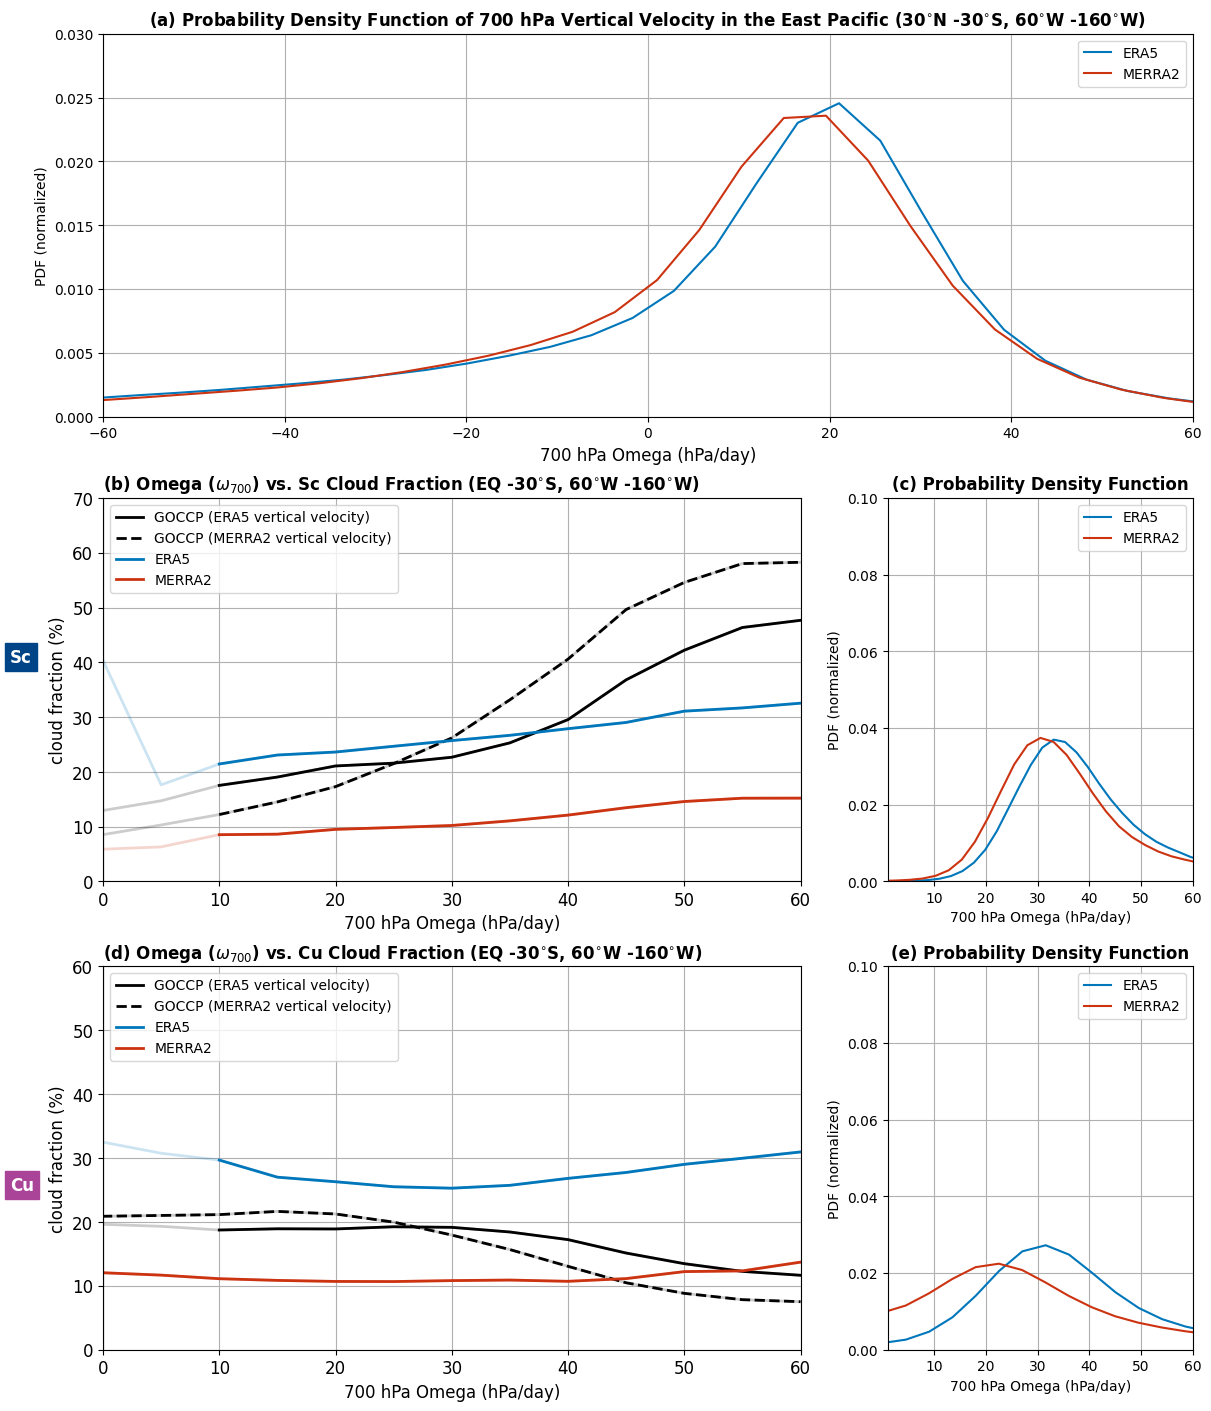

In [48]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 14),layout="constrained")

gs = GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, :])
#g1 = ax1.stairs(values=pdf_lcc_om, edges=pdf_edges_lcc_om, color="#B2182B",label="ERA5", linewidth =1.5)
#g2 = ax1.stairs(values=pdf_lcc_om_merra, edges=pdf_edges_lcc_om_merra,color="#004488", label="MERRA2", linewidth =1.5)   

g1 = ax1.plot(bin_edges_era[:-1], smoothed_hist_om_era,  color="#0077BB",label='ERA5')
g2 = ax1.plot(bin_edges_merra[:-1], smoothed_hist_om_merra, color="#CC3311",label='MERRA2')
ax1.set_xlim(-60,60)
plt.ylim(0,.03)
plt.grid()
ax1.set_xlabel(r'700 hPa Omega (hPa/day)',fontsize=12)
ax1.set_ylabel('PDF (normalized)')
plt.title('(a) Probability Density Function of 700 hPa Vertical Velocity in the East Pacific ('+str(abs(lat0))+'$^{\circ}$N -'+str(abs(lat0))+'$^{\circ}$S, ' +str(abs(lonw)) +'$^{\circ}$W -'+str(abs(lone))+'$^{\circ}$W)', fontweight = 'bold')
#plt.legend(handles=[g1,g2], loc='upper right')
plt.legend(loc='upper right')


ax2 = fig.add_subplot(gs[1, :-1])
p1,=  ax2.plot(om_val, obs_sc_region_mean_era*100, color = '#000000',linewidth =2, alpha= 0.2)
p11, = ax2.plot(np.where(om_val >= 10 , om_val,np.nan), obs_sc_region_mean_era*100, 
               color = '#000000',label="GOCCP (ERA5 vertical velocity)",linewidth =2)

p2,=  ax2.plot(om_val, obs_sc_region_mean_merra*100, color = '#000000',linewidth =2, alpha= 0.2)
p22, = ax2.plot(np.where(om_val >= 10 , om_val,np.nan), obs_sc_region_mean_merra*100,
               color = '#000000',label="GOCCP (MERRA2 vertical velocity)",linewidth =2, linestyle = '--')


p3, = ax2.plot(om_val, era_sc_region_mean*100, color="#0077BB", linewidth =2, alpha= 0.2)
p33, =  ax2.plot(np.where(om_val >= 10 , om_val,np.nan), era_sc_region_mean*100, color="#0077BB",label="ERA5", linewidth =2)

p4, = ax2.plot(om_val, merra_sc_region_mean*100, color="#CC3311",linewidth =2, alpha= 0.2)
p44, = ax2.plot(np.where(om_val >= 10 , om_val,np.nan), merra_sc_region_mean*100, color="#CC3311",label="MERRA2", linewidth =2)

plt.xlim(0,60)
plt.text(-8, 40, 'Sc', dict(size=12), color = 'white',bbox = props2, fontweight = 'bold')
ax2.grid()
plt.gca().invert_yaxis()
ax2.legend(handles=[p11,p22, p33,p44], loc = 'upper left')
#plt.title((' Omega ($\omega_{700}$) vs. Cloud Fraction averaged between EQ -'+str(abs(lat0))+'S, ' +str(abs(lonw)) +'W -'+str(abs(lone))+'W' ), loc = 'right')
ax2.set(ylim=(0,70))
ax2.axvline(x=0, color = 'black')
ax2.set_xlabel(r'700 hPa Omega (hPa/day)',fontsize=12)
ax2.set_ylabel(r'Obs cloud fraction (%)',fontsize=12)
ax2.tick_params(axis='both', labelsize=12)

plt.ylabel(r'cloud fraction (%)',fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.title(('(b) Omega ($\omega_{700}$) vs. Sc Cloud Fraction (EQ -'+str(abs(lat0))+'$^{\circ}$S, ' +str(abs(lonw)) +'$^{\circ}$W -'+str(abs(lone))+'$^{\circ}$W)'), loc = 'left', fontweight ='bold')        


ax3 = fig.add_subplot(gs[-2, -1])
#g11 = ax3.stairs(values=pdf_om, edges=pdf_edges_om, color="#B2182B",label="ERA5", linewidth =1.5)
#g22 = ax3.stairs(values=pdf_om_merra, edges=pdf_edges_om_merra,color="#004488", label="MERRA2", linewidth =1.5)

g11 = ax3.plot(bin_edges_era_sc[:-1], smoothed_hist_om_era_sc,  color="#0077BB",label='ERA5')
g22 = ax3.plot(bin_edges_merra_sc[:-1], smoothed_hist_om_merra_sc, color="#CC3311",label='MERRA2')

ax3.grid()
ax3.axvline(x=0, color = 'black')
#ax1.axhline (y=120, color = 'black')
#ax1.set_yscale('log')
#first_legend = ax1.legend(handles=[g4,g5], loc='upper left')
plt.legend(loc='upper right')
ax3.set_xlim(1,60) 
ax3.set_ylim(0,.1)
#ax1.set_ylim(0,30000)
ax3.set_ylabel('PDF (normalized)')
plt.title('(c) Probability Density Function', fontweight = 'bold')
ax3.set_xlabel(r'700 hPa Omega (hPa/day)',fontsize=10)

#-------------------------------------------------------------------------------------------
ax4 = fig.add_subplot(gs[2, :-1])
p1a,=  ax4.plot(om_val, obs_cu_region_mean_era*100, color = '#000000',linewidth =2, alpha= 0.2)
p11a, = ax4.plot(np.where(om_val >= 10 , om_val,np.nan), obs_cu_region_mean_era*100, 
                 color = '#000000',label="GOCCP (ERA5 vertical velocity)",linewidth =2)

p2a,=  ax4.plot(om_val, obs_cu_region_mean_merra*100, color = '#000000',linewidth =2, alpha= 0.2)
p22a, = ax4.plot(np.where(om_val <= 60 , om_val,np.nan), obs_cu_region_mean_merra*100, 
                 color = '#000000',label="GOCCP (MERRA2 vertical velocity)",linewidth =2, linestyle = '--')


p3a, = ax4.plot(om_val, era_cu_region_mean*100, color="#0077BB", linewidth =2, alpha= 0.2)
p33a, =  ax4.plot(np.where(om_val >= 10 , om_val,np.nan), era_cu_region_mean*100, color="#0077BB",label="ERA5", linewidth =2)

p4a, = ax4.plot(om_val, merra_cu_region_mean*100, color="#CC3311",linewidth =2, alpha= 0.2)
p44a, = ax4.plot(np.where(om_val <= 60 , om_val,np.nan), merra_cu_region_mean*100, color="#CC3311",label="MERRA2", linewidth =2)
plt.xlim(0,60)
plt.text(-8, 25, 'Cu', dict(size=12), color = 'white',bbox = props3, fontweight = 'bold')
ax4.grid()
plt.gca().invert_yaxis()
ax4.legend(handles=[p11a,p22a, p33a,p44a], loc = 'upper left')
#plt.title((' Omega ($\omega_{700}$) vs. Cloud Fraction averaged between EQ -'+str(abs(lat0))+'S, ' +str(abs(lonw)) +'W -'+str(abs(lone))+'W' ), loc = 'right')
ax4.set(ylim=(0,50))
plt.ylim(0,60)
ax4.axvline(x=0, color = 'black')
ax4.set_xlabel(r'700 hPa Omega (hPa/day)',fontsize=12)
ax4.set_ylabel(r'Obs cloud fraction (%)',fontsize=12)
ax4.tick_params(axis='both', labelsize=12)

plt.ylabel(r'cloud fraction (%)',fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.title((r'(d) Omega ($\omega_{700}$) vs. Cu Cloud Fraction (EQ -'+str(abs(lat0))+'$^{\circ}$S, ' +str(abs(lonw)) +'$^{\circ}$W -'+str(abs(lone))+'$^{\circ}$W)'), loc = 'left', fontweight = 'bold') 



ax5 = fig.add_subplot(gs[-1, -1])
#g1a = ax5.stairs(values=pdf_om_cu, edges=pdf_edges_om_cu, color="#B2182B",label="ERA5", linewidth =1.5)
#g2a = ax5.stairs(values=pdf_om_merra_cu, edges=pdf_edges_om_merra_cu,color="#004488", 
                 #label="MERRA2", linewidth =1.5)

g1a = ax5.plot(bin_edges_era_cu[:-1], smoothed_hist_om_era_cu,  color="#0077BB",label='ERA5')
g2a = ax5.plot(bin_edges_merra_cu[:-1], smoothed_hist_om_merra_cu, color="#CC3311",label='MERRA2')

#plt.legend(handles=[g1a,g2a], loc='upper right')
plt.legend(loc='upper right')

ax5.grid()
ax5.axvline(x=0, color = 'black')

ax5.set_xlim(1,60) 
ax5.set_ylim(0,.1)
#ax1.set_ylim(0,30000)
ax5.set_ylabel('PDF (normalized)')
plt.title('(e) Probability Density Function', fontweight = 'bold')
ax5.set_xlabel(r'700 hPa Omega (hPa/day)',fontsize=10)

#format_axes(fig)

#plt.show()
#plt.savefig('EPac_Composited_normalized_SH_obs_reanalysis_lcc__om(700)_'+str(abs(lat1)) +'S-'+str(abs(lat0))+'N, ' +str(abs(lone)) +'W -'+str(abs(lonw))+'W.pdf' ,bbox_inches="tight",transparent=False)